## Clone Yolov5 Repository

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 14329, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 14329 (delta 78), reused 82 (delta 41), pack-reused 14194
Receiving objects: 100% (14329/14329), 13.36 MiB | 17.92 MiB/s, done.
Resolving deltas: 100% (9890/9890), done.


In [ ]:
!pip install wandb
!wandb login

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 36.0 MB/s 
     |████████████████████████████████| 182 kB 72.6 MB/s 
     |████████████████████████████████| 166 kB 67.7 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 162 kB 39.9 MB/s 
     |████████████████████████████████| 162 kB 66.1 MB/s 
     |████████████████████████████████| 158 kB 67.5 MB/s 
     |████████████████████████████████| 157 kB 70.5 MB/s 
     |████████████████████████████████| 157 kB 70.6 MB/s 
     |████████████████████████████████| 157 kB 63.1 MB/s 
     |████████████████████████████████| 157 kB 65.6 MB/s 
     |████████████████████████████████| 157 kB 72.5 MB/s 
     |████████████████████████████████| 157 kB 76.2 MB/s 
     |████████████████████████████████| 157 kB 69.4 MB/s 
     |████████████████████████████████| 156 kB 77.5 MB/s 
  Created wheel for pathtools: fi

## Install Required Libraries

In [ ]:
!pip install -r /content/yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 44.8 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset

Put the labeled license_plate dataset in yolo5/Dataset

### Create dataset.yaml


 *You need to create a dataset.yaml file
  for the address and information of your dataset
  (such as train/test/validation image address, class name and number of classes)
  and put it in the main directory of the project.*
<br>



**template of dataset.yaml:** <br>


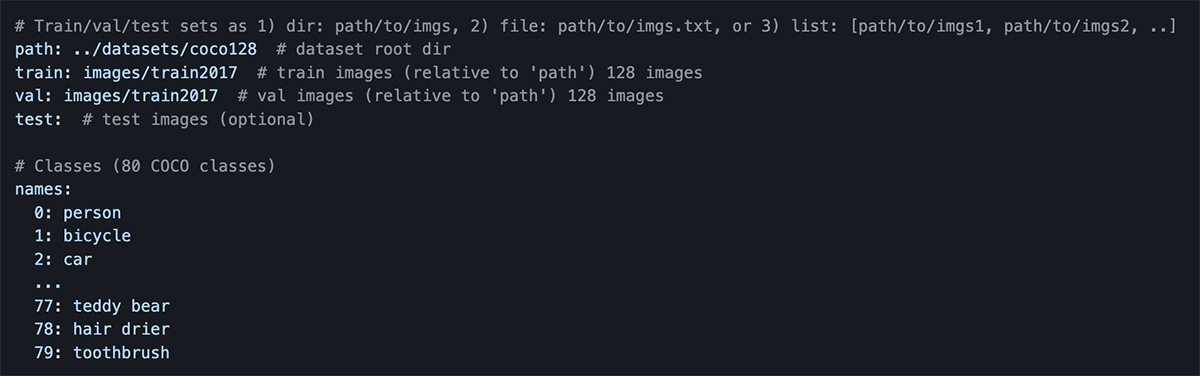


*This is an example for COCO128 Dataset. you can write your dataset information.*


# YOLOv5s


### Train

In [ ]:
# fine-tuning on a pre-trained model of yolov5

!python yolov5/train.py --img 640 --batch 32 --epochs 150 --data yolov5/dataset.yaml --weights yolov5/yolov5s.pt

wandb: Currently logged in as: behzad_1992 (behzad-1992). Use `wandb login --relogin` to force relogin
train: weights=yolov5/yolov5s.pt, cfg=, data=yolov5/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 3), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (15/15), done.
From https://github.com/ultralytics/yolov5
  

## Test

In [ ]:
# after train, it gives you weight of train and you can use it for tests.


!python yolov5/val.py --task test --data yolov5/dataset.yaml --weights '/content/yolov5/runs/train/exp6/weights/best.pt'


val: data=yolov5/dataset.yaml, weights=['/content/yolov5/runs/train/exp6/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-205-geef9057 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning '/content/yolov5/Dataset/plate/labels/test.cache' images and labels... 10 found, 0 missing, 0 empty, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:00<00:00,  1.32it/s]
                   all         10         29      0.993      0.793      0.883      0.539
Speed: 0.2ms pre-process, 6.3ms inference, 2.9ms NMS per image at sh

## Inference

In [ ]:
!python yolov5/detect.py --source '/content/yolov5/test' --weight '/content/yolov5/runs/train/exp/weights/best.pt'

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/test, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-205-geef9057 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/4 /content/yolov5/test/20892_247.jpg: 640x480 (no detections), 11.9ms
image 2/4 /content/yolov5/test/3170541.jpg: 640x320 2 plates, 13.3ms
image 3/4 /content/yolov5/test/Capture.JPG: 352x640 2 plates, 13.2ms
image 4/4 /content/yolov5/test/nody-مشخصات-فنی-ماشین-های-رالی-1635239124.jpg: 480x640 3 plates, 13.

# YOLOv5m


## Train

In [ ]:
# fine-tuning on a pre-trained model of yolov5

!python yolov5/train.py --img 640 --batch 8 --epochs 50 --data yolov5/dataset.yaml --weights yolov5/yolov5m.pt

wandb: Currently logged in as: behzad_1992 (behzad-1992). Use `wandb login --relogin` to force relogin
train: weights=yolov5/yolov5m.pt, cfg=, data=yolov5/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 10 (delta 3), reused 8 (delta 3), pack-reused 0
Unpacking objects: 100% (10/10), done.
From https://github.com/ultralytics/yolov5
 * [ne

## Test

In [ ]:
# after train, it gives you weight of train and you can use it for tests.

!python yolov5/val.py --task test --data yolov5/dataset.yaml --weights '/content/yolov5/runs/train/exp4/weights/best.pt'


val: data=yolov5/dataset.yaml, weights=['/content/yolov5/runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-205-geef9057 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
test: Scanning '/content/yolov5/Dataset/plate/labels/test.cache' images and labels... 10 found, 0 missing, 0 empty, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:00<00:00,  1.15it/s]
                   all         10         29      0.955      0.828      0.896      0.551
Speed: 0.2ms pre-process, 16.2ms inference, 1.8ms NMS per image at 

## Inference

In [ ]:
!python yolov5/detect.py --source '/content/yolov5/test' --weight '/content/yolov5/runs/train/exp/weights/best.pt'

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/test, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-205-geef9057 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/4 /content/yolov5/test/20892_247.jpg: 640x480 2 plates, 22.2ms
image 2/4 /content/yolov5/test/3170541.jpg: 640x320 2 plates, 20.1ms
image 3/4 /content/yolov5/test/Capture.JPG: 352x640 2 plates, 21.6ms
image 4/4 /content/yolov5/test/nody-مشخصات-فنی-ماشین-های-رالی-1635239124.jpg: 480x640 3 plates, 23.2ms
Sp

# YOLOv5l

## Train

In [ ]:
# fine-tuning on a pre-trained model of yolov5

!python yolov5/train.py --img 640 --batch 16 --epochs 75 --data yolov5/dataset.yaml --weights yolov5/yolov5l.pt

wandb: Currently logged in as: behzad_1992 (behzad-1992). Use `wandb login --relogin` to force relogin
train: weights=yolov5/yolov5l.pt, cfg=, data=yolov5/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=75, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 3), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (15/15), done.
From https://github.com/ultralytics/yolov5
   

## Test

In [ ]:
# after train, it gives you weight of train and you can use it for tests.


!python yolov5/val.py --task test --data yolov5/dataset.yaml --weights '/content/yolov5/runs/train/exp9/weights/best.pt'


val: data=yolov5/dataset.yaml, weights=['/content/yolov5/runs/train/exp9/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-205-geef9057 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
test: Scanning '/content/yolov5/Dataset/plate/labels/test.cache' images and labels... 10 found, 0 missing, 0 empty, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:01<00:00,  1.05s/it]
                   all         10         29      0.954      0.759      0.877      0.587
Speed: 0.2ms pre-process, 26.8ms inference, 2.3ms NMS per image at

## Inference

In [ ]:
!python yolov5/detect.py --source '/content/yolov5/test' --weight '/content/yolov5/runs/train/exp/weights/best.pt'

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/test, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-205-geef9057 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/4 /content/yolov5/test/20892_247.jpg: 640x480 2 plates, 39.9ms
image 2/4 /content/yolov5/test/3170541.jpg: 640x320 2 plates, 26.6ms
image 3/4 /content/yolov5/test/Capture.JPG: 352x640 2 plates, 27.2ms
image 4/4 /content/yolov5/test/nody-مشخصات-فنی-ماشین-های-رالی-1635239124.jpg: 480x640 4 plates, 33.9ms
S